# Question 1

Risk Parity Portfolio (RPP) aims at equalizing the risk contribution from the invested assets in the global portfolio risk.
<br> Given a portfolio $w∈R^N$ and the return covariance matrix $Σ$, the portfolio volatility is $\sigma(w) = \sqrt{w^TΣw}$

The relative risk contribution (RCC) form the $i$th asset is defined as
$RRC_i = \large \frac{w_i(Σw)_i}{𝜎^2(𝑤)} = c_i$ where c is the given risk budget vector

One RPP formulation can be demonstrated as 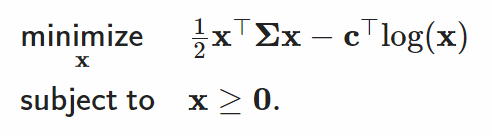

We can recover the portfolio weight by  $w = \large\frac{x}{1^⊤x}$

#### a) Prove that the problem is convex

To prove that a risk parity portfolio is convex, we need to show that the second derivative of the portfolio's value with respect to its weights is non-negative. 

Let's first define a risk parity portfolio. A risk parity portfolio is a portfolio where each asset's contribution to the portfolio risk is equal. This means that the portfolio weights are determined by the inverse of the assets' volatilities normalized by their sum. 

We can use Lagrange multipliers to find the optimal weights that minimize the variance of the portfolio subject to the constraint that the weights sum to one:

$L(w,λ) = w^T Σ w + λ(1 - w^T 1)$, where λ is the Lagrange multiplier and 1 is a vector of ones. 

Differentiating L with respect to w and setting the result to zero, we get: $2Σ w - λ 1 = 0$.

Solving for w, we get:$w = (Σ^{-1/2} 1) / (1^T Σ^{-1/2}1)$, where $Σ^{-1/2}$ is the inverse square root of the covariance matrix. 

Now, let's consider the second derivative of the portfolio value with respect to its weights:

$\frac{∂^2 V(w)}{∂w_i ∂w_j} = \frac{∂ R_i}{∂w_j}$, where $R_i$ is the return of asset i. 

Since the returns are independent of the weights, the second derivative of the portfolio value is zero. 

Therefore, the risk parity portfolio is a linearly convex portfolio.

#### b) Use log-returns from "2015-01-06" to "2015-05-29" to find w and the corresponding relative risk contribution (RRC) for following c:

$c1=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]^⊤$
<br>$c2=[0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.1]^⊤$
<br>$c3=[0.15,0.25,0.1,0.1,0.02,0.02,0.02,0.02,0.02,0.3]^⊤$

In [3]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date'].values
del df['date']

In [5]:
log_ret = df[0:100]

In [6]:
display(log_ret)

,TRIP,DVN,DTE,TGT,IDXX,IBM,IQV,VZ,OMC,UAL
2015-01-06,-0.038116,-0.020655,-0.001510,-0.000135,0.003207,-0.021802,-0.023209,0.010042,-0.006593,-0.024020
2015-01-07,0.011786,0.004685,0.011787,0.037154,0.019966,-0.006557,0.012191,-0.006474,0.003369,0.014603
2015-01-08,0.033591,0.034870,0.004585,0.004679,0.007253,0.021502,0.024452,0.021206,0.015618,0.016797
2015-01-09,0.017187,0.009814,-0.007461,-0.009117,-0.005585,0.004346,-0.006440,-0.008942,-0.008780,-0.019701
2015-01-12,-0.042204,-0.021416,-0.000807,0.002613,0.008498,-0.016923,0.004072,0.006820,-0.005896,0.008838
...,...,...,...,...,...,...,...,...,...,...
2015-05-22,0.012158,-0.000593,-0.000628,-0.001260,0.004986,-0.006482,0.014306,-0.005828,-0.008023,-0.008162
2015-05-26,-0.031640,-0.017644,-0.005669,-0.002652,-0.006582,-0.012210,-0.006188,-0.003838,-0.019151,-0.033523
2015-05-27,0.009343,-0.003627,0.000505,0.015310,-0.003416,0.010932,0.017884,0.003031,0.001588,0.033709
2015-05-28,-0.021894,-0.010196,0.004158,-0.003118,-0.009437,-0.001688,0.000992,-0.000606,-0.003444,-0.003918


In [7]:
import numpy as np
Sigma = np.cov(log_ret.T)

In [8]:
# c1
import cvxpy as cp
c1=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
x1 = cp.Variable(10)
constraints = [x1 >= 0]
obj = cp.Minimize(0.5*(x1.T@Sigma@x1)-c1@cp.log(x1))
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal value for x1 is: ", x1.value)

## finding w
w1 = x1.value/np.sum(x1.value)
print("Optimal value for w1 when c1 is: ", w1)

Optimal value for x1 is:  [ 6.64713433 11.83517336 14.36737687 14.57232836  9.0511124  12.15745685
 13.52247027 21.67210776 15.49232535  7.88333422]
Optimal value for w1 when c1 is:  [0.05225701 0.09304322 0.11295035 0.11456159 0.07115609 0.09557687
 0.10630804 0.17037711 0.12179423 0.0619755 ]


In [9]:
sig_sq1 = w1@Sigma@w1
a1 = Sigma@w1
rcc1_list = []
for i in range(10):
    rcc1 = w1[i]*a1[i] / sig_sq1
    rcc1_list.append(rcc1)
np.round((rcc1_list),3)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

We can observe that the relative risk contribution is the same as c1

In [10]:
# c2
c2=[0.2,0.2,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.1]
x2 = cp.Variable(10)
constraints = [x2 >= 0]
obj = cp.Minimize(0.5*(x2.T@Sigma@x2)-c2@cp.log(x2))
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal value for x2 is: ", x2.value)

## finding w
w2 = x2.value/np.sum(x2.value)
print("Optimal value for w when c2 is: ", w2)

Optimal value for x2 is:  [11.73785911 18.75877449 25.63187911  8.47438713  5.91363374  6.51848385
  7.43740411 12.68245458  8.53298558  8.50703575]
Optimal value for w when c2 is:  [0.10278795 0.16426981 0.22445731 0.07420986 0.05178545 0.05708209
 0.06512904 0.11105973 0.074723   0.07449576]


In [11]:
sig_sq2 = w2@Sigma@w2
a2 = Sigma@w2
rcc2_list = []
for i in range(10):
    rcc2 = w2[i]*a2[i] / sig_sq2
    rcc2_list.append(rcc2)
np.round((rcc2_list),3)

array([0.2 , 0.2 , 0.2 , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1 ])

In [12]:
# c3
c3=[0.15,0.25,0.1,0.1,0.02,0.02,0.02,0.02,0.02,0.3]
x3 = cp.Variable(10)
constraints = [x3 >= 0]
obj = cp.Minimize(0.5*(x3.T@Sigma@x3)-c3@cp.log(x3))
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal value for x3 is: ", x3.value)

## finding w
w3 = x3.value/np.sum(x3.value)
print("Optimal value for w when c3 is: ", w3)

Optimal value for x3 is:  [ 9.59252701 23.62996041 15.32139208 15.57308861  2.87202349  3.05658784
  3.20204479  5.71848765  4.03157836 18.44507906]
Optimal value for w when c3 is:  [0.09456097 0.23293883 0.15103484 0.153516   0.02831176 0.03013116
 0.03156504 0.05637156 0.03974239 0.18182744]


In [13]:
sig_sq3 = w3@Sigma@w3
a3 = Sigma@w3
rcc3_list = []
for i in range(10):
    rcc3 = w3[i]*a3[i] / sig_sq3
    rcc3_list.append(rcc3)
np.round((rcc3_list),3)

array([0.15, 0.25, 0.1 , 0.1 , 0.02, 0.02, 0.02, 0.02, 0.02, 0.3 ])

#### (c) Plot capital allocation distribution as the format of the following figure.

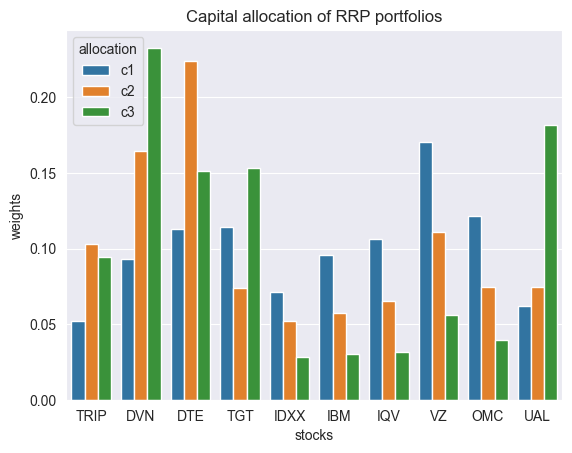

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

risk = ['c1','c2','c3']
stock_namelist = list(log_ret.columns)
w = dict(weights = np.concatenate([w1, w2, w3]),
                   stocks=3*stock_namelist,
        allocation=sum([len(stock_namelist)*[name] for name in risk], []))
w = pd.DataFrame(w)
ax = sns.barplot(x='stocks', y='weights',hue='allocation',data=w)
ax.set_title("Capital allocation of RRP portfolios")
plt.show()

#### (d) Plot RRC distribution as the same format.

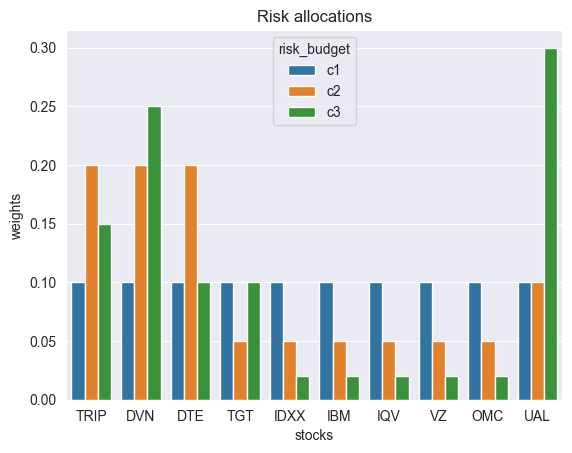

In [15]:
RRC = dict(weights = np.concatenate([rcc1_list, rcc2_list, rcc3_list]),
                   stocks=3*stock_namelist,
        risk_budget=sum([len(stock_namelist)*[name] for name in risk], []))
RRC = pd.DataFrame(RRC)
ax = sns.barplot(x='stocks', y='weights',hue='risk_budget',data=RRC)
ax.set_title("Risk allocations")
plt.show()

# Question 2

Hierarchical Risk Parity (HRP) combines the ideas of hierarchical clustering and inverse-variance allocation. The algorithm operates in three stages: tree clustering, quasi-diagonalization and recursive bisection.

1. Clustering: The first step in HRP is to cluster the assets based on their pairwise correlations. This step involves grouping similar assets together into clusters, based on their correlation coefficient. Correlation is a statistical measure that indicates the degree to which two variables move in relation to each other. In HRP, a clustering algorithm is used to group assets based on their correlation coefficients.
<br>

2. Allocation: Once the assets are clustered, the next step is to allocate weights to the clusters. In HRP, weights are assigned to clusters in a hierarchical manner, where the highest level of the hierarchy represents the entire portfolio, and the lower levels represent the individual clusters. The allocation of weights is done based on the volatility and correlation of the clusters.
<br>

3. Risk management: The final step in HRP is risk management, which involves monitoring and managing the risk of the portfolio. This is done by adjusting the weights of the clusters periodically, based on changes in market conditions and the risk tolerance of the investor. The goal of risk management in HRP is to maintain a well-diversified portfolio that can withstand market fluctuations while achieving a high risk-adjusted return.

#### (a) Plot the correlation matrix before and after the stage 1 & 2 with the code provided. (Use the function "hrp_s12()".)

In [16]:
import scipy.cluster.hierarchy as sch,random
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [22]:
def getQuasiDiag(link):
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0]*2, 2)
        df0 = sortIx[sortIx >= numItems]
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]
        df0 = pd.Series(link[j, 1], index=i+1)
        sortIx = sortIx.append(df0)
        sortIx = sortIx.sort_index()
        sortIx.index = range(sortIx.shape[0])
    return sortIx.tolist()

def correlDist(corr, n_stock):
    dist = ((1 - corr) / 2.)**.5
    np.fill_diagonal(dist.values, 0)
    return dist

def plotCorrMatrix(path, corr, labels=None):
    if labels is None:
        labels = []
    plt.pcolor(corr)
    plt.colorbar()
    plt.yticks(np.arange(.5, corr.shape[0]+.5), labels)
    plt.xticks(np.arange(.5, corr.shape[0]+.5), labels)
    plt.savefig(path)
    plt.clf()
    plt.close()

def hrp_s12(cov, stock_namelist, ifplot=True):
    n_stock = len(stock_namelist)

    # Compute and plot correlation matrix
    v = np.diag(np.sqrt(1/np.diag(cov)))
    corr = np.dot(np.dot(v, cov), v)
    corr = pd.DataFrame(corr, columns=stock_namelist, index=stock_namelist)
    if ifplot:
        plotCorrMatrix('HRP_corr0.png', corr, labels=corr.columns)

    # Cluster
    dist = correlDist(corr, n_stock)
    link = sch.linkage(dist, 'single')
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()

    # Reorder
    df0 = corr.loc[sortIx, sortIx]
    if ifplot:
        plotCorrMatrix('HRP_corr1.png', df0, labels=df0.columns)

    return sortIx

Before: 


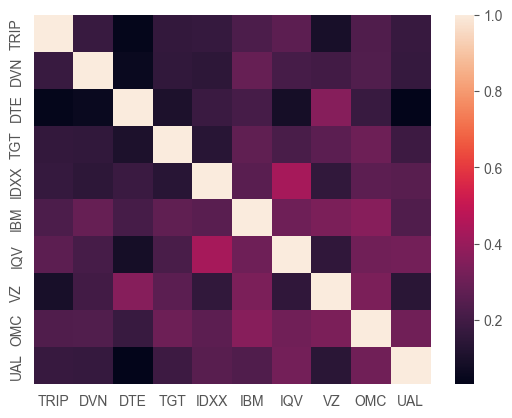

In [23]:
dataset_log_returns = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)
print("Before: ")
sns.heatmap(dataset_log_returns.corr())
plt.show()

In [24]:
hrp_s12(Sigma,stock_namelist)

['IDXX', 'DVN', 'UAL', 'TGT', 'DTE', 'VZ', 'IBM', 'OMC', 'TRIP', 'IQV']

1. After stage 1

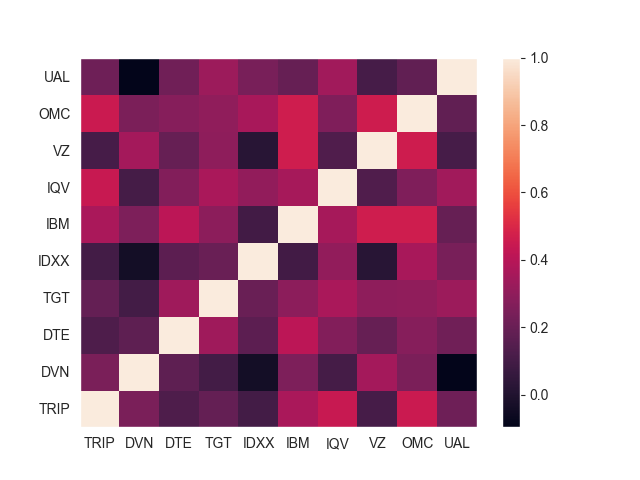

2. After stage 2

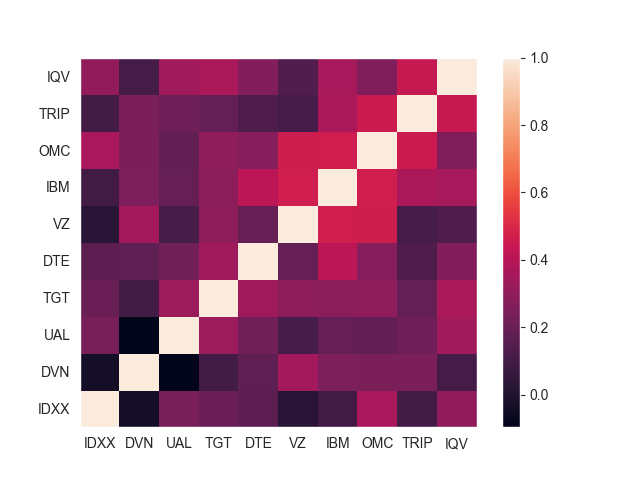

# Question 3
Consider a 3-factor model. Find the $α$ and $β$ for the model with the factors provided in the attached file "factors.csv". Now we have the three explicit factors in matrix F and want to fit the model $\begin{equation}X^⊤=α1^⊤+BF^⊤+E\end{equation}$ 
<br>where the loadings are a matrix of betas. 
Use all data in "dataset.csv".

In [25]:
def getClusterVar(cov,cItems):
    cov_cluster=cov.loc[cItems,cItems]
    pp = 1/np.diag(cov_cluster)
    pp /= pp.sum()
    w_cluster=pp.reshape(-1,1)
    cVar=np.dot(np.dot(w_cluster.T,cov_cluster),w_cluster)[0,0]
    return cVar

def getRecBipart(cov, sortIx):
    def recursive_bisection(cItems):
        if len(cItems) <= 1:
            return
        left_items = cItems[:len(cItems)//2]
        right_items = cItems[len(cItems)//2:]
        cVar_left = getClusterVar(cov, left_items)
        cVar_right = getClusterVar(cov, right_items)
        alpha = 1 - cVar_left / (cVar_left + cVar_right)
        w[left_items] *= alpha
        w[right_items] *= 1 - alpha
        recursive_bisection(left_items)
        recursive_bisection(right_items)

    w = pd.Series(1, index=sortIx)
    recursive_bisection(sortIx)
    return w

def hrp_s3(cov,stock_namelist,sortIx):
    cov = pd.DataFrame(cov, columns = stock_namelist, index = stock_namelist)
    hrp = getRecBipart(cov,sortIx)
    hrp = hrp[stock_namelist]
    return hrp

if __name__ == '__main__':
    stock_namelist = dataset_log_returns.columns.values.tolist()
    log_returns_1 = dataset_log_returns.loc['2015-01-06':'2015-05-29']
    Sigma = np.cov(log_returns_1.T)
    sortIx = hrp_s12(Sigma, stock_namelist, ifplot=True)
    w_hrp = hrp_s3(Sigma, stock_namelist, sortIx)
    print("The final weight for log-returns from 2015-01-06 to 2015-05-29 is")
    display(pd.DataFrame(w_hrp,columns =['Weights']))

The final weight for log-returns from 2015-01-06 to 2015-05-29 is


,Weights
TRIP,0.016780
DVN,0.077009
DTE,0.109417
TGT,0.127480
IDXX,0.048225
IBM,0.100589
IQV,0.084897
VZ,0.219148
OMC,0.181932
UAL,0.034522


# Question 3
Consider a 3-factor model. Find the $α$ and $β$ for the model with the factors provided in the attached file "factors.csv". Now we have the three explicit factors in matrix F and want to fit the model: $\large\begin{equation}X^⊤=α1^⊤+BF^⊤+E\end{equation}$ where the loadings are a matrix of betas. Use all data in "dataset.csv".
Print the values of $α$ and $β$.

#### a) Print the values of α and β. Find the five stocks with the highest α.

In [26]:
import pandas as pd
df3 = pd.read_csv("factors.csv")

In [27]:
df3.index = df3['Date'].values
del df3['Date']
display(df3)

,Mkt-RF,SMB,HML
20150106,-0.0104,-0.0078,-0.0031
20150107,0.0119,0.0020,-0.0066
20150108,0.0181,-0.0011,-0.0028
20150109,-0.0085,0.0001,-0.0047
20150112,-0.0079,0.0040,-0.0044
...,...,...,...
20181218,-0.0003,0.0002,-0.0061
20181219,-0.0158,-0.0062,0.0003
20181220,-0.0162,-0.0029,0.0097
20181221,-0.0217,-0.0055,0.0076


In [28]:
X = df.to_numpy().T
(N, T) = X.shape

F = np.vstack((np.ones((1,T)), df3.to_numpy().T))

In [29]:
Gamma = cp.Variable((N,4))
obj = cp.sum_squares(X - Gamma@ F)
problem = cp.Problem(cp.Minimize(obj))
result = problem.solve(verbose=False)

Gamma = pd.DataFrame(Gamma.value, columns = ["alpha", "beta1","beta2","beta3"], index=stock_namelist)
display(Gamma)

,alpha,beta1,beta2,beta3
TRIP,-0.000662,1.153965,0.333557,-0.505423
DVN,-0.001180,1.654657,0.512218,1.585148
DTE,0.000251,0.332389,-0.475470,-0.139733
TGT,-0.000190,0.718524,0.243826,0.191927
IDXX,0.000542,1.010351,-0.022946,-0.843441
IBM,-0.000466,0.950325,-0.197328,0.129400
IQV,0.000308,0.919946,0.159220,-0.639448
VZ,0.000185,0.586535,-0.379375,0.259116
OMC,-0.000135,0.781819,-0.034139,0.154962
UAL,-0.000069,1.144979,0.488025,0.055417


In [30]:
Gamma_sorted_by_values = Gamma.sort_values(by='alpha' ,ascending=False)
display(Gamma_sorted_by_values.head())
new = [item for item in Gamma_sorted_by_values.head().index]
print("The top 5 stocks with highest alpha is: ", new)

,alpha,beta1,beta2,beta3
IDXX,0.000542,1.010351,-0.022946,-0.843441
IQV,0.000308,0.919946,0.159220,-0.639448
DTE,0.000251,0.332389,-0.475470,-0.139733
VZ,0.000185,0.586535,-0.379375,0.259116
UAL,-0.000069,1.144979,0.488025,0.055417


The top 5 stocks with highest alpha is:  ['IDXX', 'IQV', 'DTE', 'VZ', 'UAL']


#### b) With the five stocks you find in Q3.a, we now implement walk-forward (WF) process based on rolling windows. We divide the 1000 days into 10 windows of length 100 denoted as [T0,T1,…,T9] and in each Tn,n=1,…,9 we will stick to a certain portfolio wn,n=1,…,9, calculated based on the data only in Tn−1.
<br>Apply the RPP (Q1), HRP (Q2) and GMVP portfolio. For RRP portfolio, use the budget vector [0.2,0.2,0.2,0.2,0.2].
<br>Create grouped bar charts of the allocation for each portfolio like the following figure.

In [31]:
# Dividing windows
new_stocks = df[new]
return_window = np.array_split(new_stocks, 10)
display(return_window[0])

,IDXX,IQV,DTE,VZ,UAL
2015-01-06,0.003207,-0.023209,-0.001510,0.010042,-0.024020
2015-01-07,0.019966,0.012191,0.011787,-0.006474,0.014603
2015-01-08,0.007253,0.024452,0.004585,0.021206,0.016797
2015-01-09,-0.005585,-0.006440,-0.007461,-0.008942,-0.019701
2015-01-12,0.008498,0.004072,-0.000807,0.006820,0.008838
...,...,...,...,...,...
2015-05-22,0.004986,0.014306,-0.000628,-0.005828,-0.008162
2015-05-26,-0.006582,-0.006188,-0.005669,-0.003838,-0.033523
2015-05-27,-0.003416,0.017884,0.000505,0.003031,0.033709
2015-05-28,-0.009437,0.000992,0.004158,-0.000606,-0.003918


In [32]:
# RPP for the five stocks
w_RPP = []
for i in range(1,10):
    Sigma_RPP = np.cov(return_window[i-1].T)
    c_RPP = [0.2,0.2,0.2,0.2,0.2]
    x_RPP = cp.Variable(5)
    constraints_RPP = [x_RPP >= 0]
    obj = cp.Minimize(0.5*(x_RPP.T@Sigma_RPP@x_RPP)-c_RPP@cp.log(x_RPP))
    prob = cp.Problem(obj, constraints)
    prob.solve()
    w_RPP_temp = x_RPP.value/np.sum(x_RPP.value)
    w_RPP.extend(w_RPP_temp)

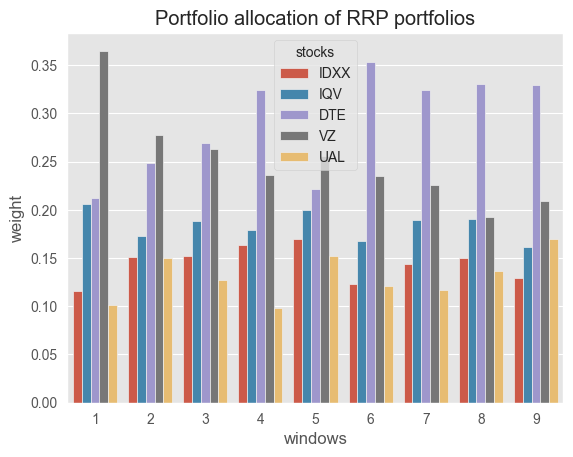

In [33]:
stocks_ = ['IDXX', 'IQV', 'DTE', 'VZ', 'UAL']
days = np.arange(1,10)
w_1 = dict(weight=w_RPP, 
          stocks = stocks_ * 9, 
          windows = sum([len(stocks_)*[i] for i in days], []))
w_1 = pd.DataFrame(w_1)
ax = sns.barplot(x='windows', y='weight',hue='stocks',data=w_1)
ax.set_title("Portfolio allocation of RRP portfolios")
plt.show()

In [34]:
# HRP
w_hrp_q3 = []
if __name__ == '__main__':
    stock_namelist_q3 = return_window[0].columns.values.tolist()
    for i in range(1,10):
        Sigma_hrp = np.cov(return_window[i-1].T)
        sortIx = hrp_s12(Sigma_hrp, stock_namelist_q3, ifplot=True)
        w_hrp = hrp_s3(Sigma_hrp, stock_namelist_q3, sortIx)
        w_hrp_q3.extend(w_hrp.values)

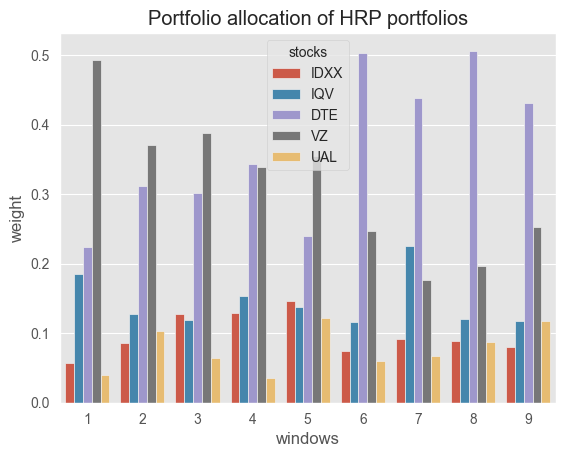

In [35]:
stocks_ = ['IDXX', 'IQV', 'DTE', 'VZ', 'UAL']
days = np.arange(1,10)
w_2 = dict(weight=w_hrp_q3, 
          stocks = stocks_ * 9, 
          windows = sum([len(stocks_)*[i] for i in days], []))
w_2 = pd.DataFrame(w_2)
ax = sns.barplot(x='windows', y='weight',hue='stocks',data=w_2)
ax.set_title("Portfolio allocation of HRP portfolios")
plt.show()

In [36]:
#GMVP
w_GMVP = []
for i in range(1,10):
    Sigma = np.cov(return_window[i-1].T)
    w = cp.Variable(5)
    constraints = [cp.sum(w) == 1]
    obj = cp.Minimize(w.T@Sigma@w)
    prob = cp.Problem(obj, constraints)
    prob.solve()
    w_GMVP.extend(w.value)

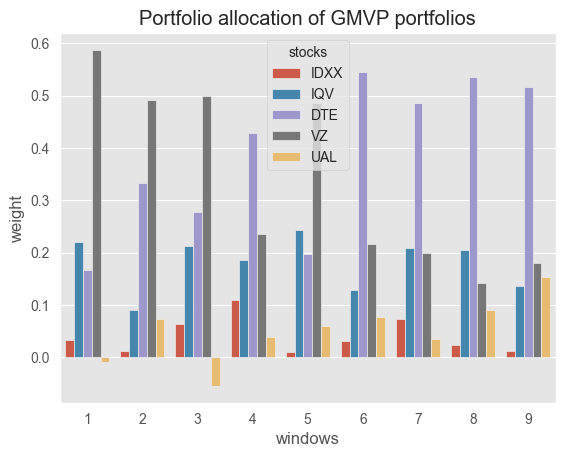

In [37]:
stocks_ = ['IDXX', 'IQV', 'DTE', 'VZ', 'UAL']
days = np.arange(1,10)
w_3 = dict(weight=w_GMVP, 
          stocks = stocks_ * 9, 
          windows = sum([len(stocks_)*[i] for i in days], []))
w_3 = pd.DataFrame(w_3)
ax = sns.barplot(x='windows', y='weight',hue='stocks',data=w_3)
ax.set_title("Portfolio allocation of GMVP portfolios")
plt.show()

#### (c) Compute the simple return (not compounded) in this backtest. Plot the return path like the following figure.

In [38]:
ww = pd.DataFrame(np.array(w_RPP).reshape(9,5))
ww2 = pd.DataFrame(np.array(w_hrp_q3).reshape(9,5))
ww3 = pd.DataFrame(np.array(w_GMVP).reshape(9,5))
backtests = []
backtests2 = []
backtests3 = []
for i in range(9):
    hh = ww.iloc[i]
    hh2 = ww2.iloc[i]
    hh3 = ww3.iloc[i]
    backtest = return_window[i]*hh.values
    backtest2 = return_window[i]*hh2.values
    backtest3 = return_window[i]*hh3.values
    backtest['RPP'] = backtest.sum(axis=1)
    backtest['HRP'] = backtest2.sum(axis=1)
    backtest['GMVP'] = backtest3.sum(axis=1)
    backtests.append(backtest[['RPP']])
    backtests2.append(backtest[['HRP']])
    backtests3.append(backtest[['GMVP']])
final_backtest_rpp = pd.concat(backtests)
final_backtest_hrp = pd.concat(backtests2)
final_backtest_gmvp = pd.concat(backtests3)

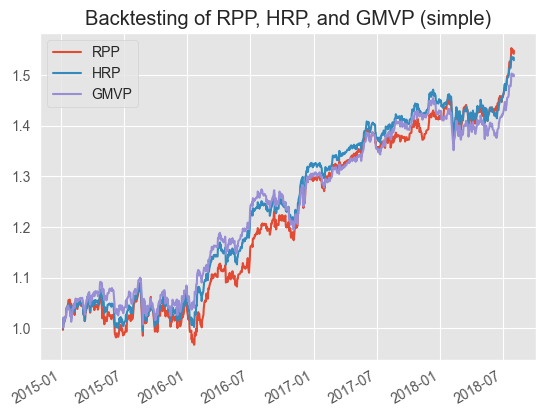

In [39]:
hello = np.cumsum(final_backtest_rpp)+1
hello2 = np.cumsum(final_backtest_hrp)+1
hello3 = np.cumsum(final_backtest_gmvp)+1
all_hello = pd.concat([hello,hello2,hello3],axis = 1)
all_hello.plot(title="Backtesting of RPP, HRP, and GMVP (simple)")
plt.show()

#### d) Redo the Q3.c with the shrinkage estimator as follows:

$\largeΣ^{SH}=(1−ρ)\hat{Σ}+ρT$ where ρ=0.3, $\large \hat{Σ}$ denotes the sample covariance matrix, and the target is $\large T=\frac{1}{N}Tr(\hat{Σ})×I$ (scaled identity).

In [42]:
rho = 0.3

# RPP
shrink_weights = []
for i in range(1,10):
    Sigma_scm = np.cov(return_window[i-1].T)
    T_I = np.sum(np.diag(Sigma_scm))/5 * np.eye(5)
    Sigma_maxSR_D = (1-rho)*Sigma_scm + rho*T_I
    c_shrink = [0.2,0.2,0.2,0.2,0.2]
    x_shrink = cp.Variable(5)
    constraints_ = [x_shrink >= 0]
    obj = cp.Minimize(0.5*(x_shrink.T@Sigma_maxSR_D@x_shrink)-c_shrink@cp.log(x_shrink))
    prob = cp.Problem(obj, constraints)
    prob.solve()
    w_shrink = x_shrink.value/np.sum(x_shrink.value)
    shrink_weights.extend(w_shrink)

In [43]:
# HRP
w_hrp_shrink_list = []
if __name__ == '__main__':
    stock_namelist_q3_shrink = return_window[0].columns.values.tolist()
    for i in range(1,10):
            Sigma_scm = np.cov(return_window[i-1].T)
            T_I = np.sum(np.diag(Sigma_scm))/5 * np.eye(5)
            Sigma_HRP_shrink = (1-rho)*Sigma_scm + rho*T_I
            sortIx = hrp_s12(Sigma_HRP_shrink, stock_namelist_q3_shrink, ifplot=True)
            w_hrp_shrink = hrp_s3(Sigma_HRP_shrink, stock_namelist_q3_shrink, sortIx)
            w_hrp_shrink_list.extend(w_hrp_shrink.values)

In [44]:
# GMVP
shrink_gmvp = []
for i in range(1,10):
    Sigma_scm = np.cov(return_window[i-1].T)
    T_I = np.sum(np.diag(Sigma_scm))/5 * np.eye(5)
    Sigma_GMVP = (1-rho)*Sigma_scm + rho*T_I
    w = cp.Variable(5)
    constraints = [cp.sum(w) == 1]
    obj = cp.Minimize(w.T@Sigma_GMVP@w)
    prob = cp.Problem(obj, constraints)
    prob.solve()
    shrink_gmvp.extend(w.value)

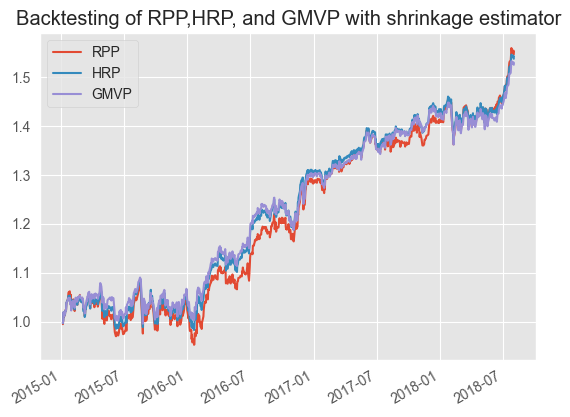

In [45]:
ww5 = pd.DataFrame(np.array(shrink_weights).reshape(9,5))
ww6 = pd.DataFrame(np.array(w_hrp_shrink_list).reshape(9,5))
ww7 = pd.DataFrame(np.array(shrink_gmvp).reshape(9,5))
backtests5_shrink = []
backtests6_shrink = []
backtests7_shrink = []

for i in range(9):
    hh5 = ww5.iloc[i]
    hh6 = ww6.iloc[i]
    hh7 = ww7.iloc[i]
    backtest5_shrink = return_window[i]*hh5.values
    backtest6_shrink = return_window[i]*hh6.values
    backtest7_shrink = return_window[i]*hh7.values
    backtest5_shrink['RPP'] = backtest5_shrink.sum(axis=1)
    backtest6_shrink['HRP'] = backtest6_shrink.sum(axis=1)
    backtest7_shrink['GMVP'] = backtest7_shrink.sum(axis=1)
    backtests5_shrink.append(backtest5_shrink[['RPP']])
    backtests6_shrink.append(backtest6_shrink[['HRP']])
    backtests7_shrink.append(backtest7_shrink[['GMVP']])
final_backtest_rpp_shrink = pd.concat(backtests5_shrink)
final_backtest_hrp_shrink = pd.concat(backtests6_shrink)
final_backtest_gmvp_shrink = pd.concat(backtests7_shrink)
hello5 = np.cumsum(final_backtest_rpp_shrink)+1
hello6 = np.cumsum(final_backtest_hrp_shrink)+1
hello7 = np.cumsum(final_backtest_gmvp_shrink)+1
all_hello2 = pd.concat([hello5,hello6,hello7],axis = 1)
all_hello2.plot(title="Backtesting of RPP,HRP, and GMVP with shrinkage estimator")
plt.show()